In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk #for natural language processing

In [2]:
df = pd.read_csv(r'C:\Users\yesmi\OneDrive\Desktop\Data Analytics Projects\Set 2\amazon-fine-food-reviews\Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df['Text'][5])
print(df['Score'][5])

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.
4


In [5]:
df.shape

(568454, 10)

In [6]:
df=df.head(1000)
df.to_csv('1000 Amazon Fine Food Reviews.csv')

# Exploratory Data Analysis

In [7]:
print("Shape:",df.shape,'\n')

#data type of each column
print(df.dtypes)

Shape: (1000, 10) 

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [8]:
#number of missing values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
#number of duplicate rows
df.duplicated().sum()

0

In [10]:
df.Score.value_counts()

5    642
4    138
1     98
3     75
2     47
Name: Score, dtype: int64

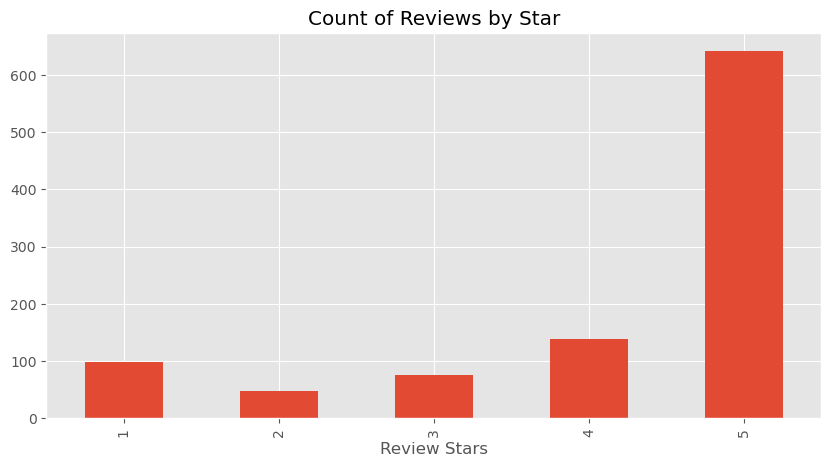

In [11]:
#Plot a bar chart of the count of reviews by score

ax =df['Score'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Count of Reviews by Star',
          figsize=(10, 5))

ax.set_xlabel('Review Stars')

plt.savefig('Count of Reviews by Star',dpi=300)
plt.show()

**The dataset is biased towards positive reviews**

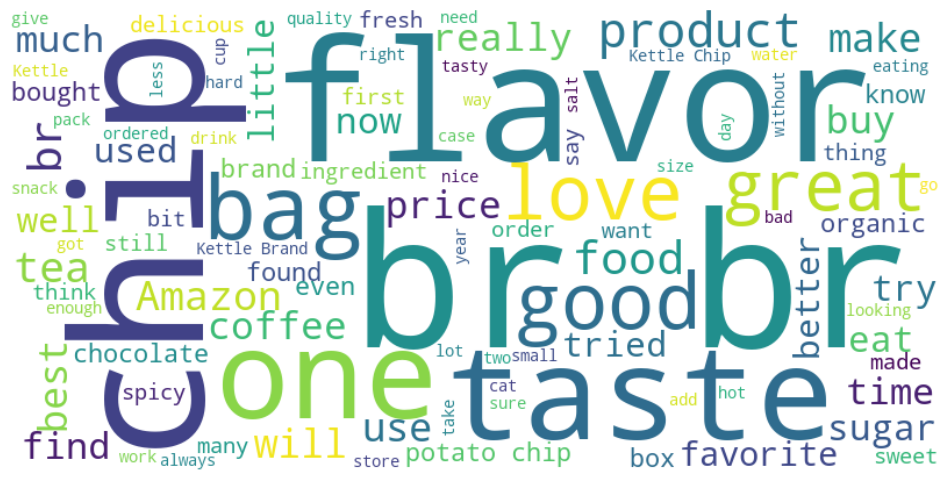

In [12]:
#Plot a word cloud of the most common words in the review text

from wordcloud import WordCloud, STOPWORDS

# Create a set of stop words
stopwords = set(STOPWORDS)

# Join the review text into one big string
text = ' '.join(df['Text'].tolist())

# Create the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=100, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Basic NLTK

In [13]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yesmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yesmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\yesmi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\yesmi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
example = df['Text'][50]
print(example)

tokens = nltk.word_tokenize(example)
print(tokens)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [15]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [16]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# 1. VADER Model for Seniment Scoring
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis model that is specifically designed to analyze sentiment in social media texts such as tweets, reviews, and comments. 

VADER can handle both polarity (positive, negative, neutral) and intensity (the degree of positivity or negativity), and it has been shown to perform well on a wide range of social media texts.

* VADER scores each word in a text individually, without taking context into consideration.

In [17]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yesmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [19]:
sia.polarity_scores('This food is terrible!!')

{'neg': 0.551, 'neu': 0.449, 'pos': 0.0, 'compound': -0.5696}

In [20]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [21]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [22]:
#Run the polarity score for the entire dataset 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
#Merge vaders with the original dataframe
vaders = pd.DataFrame(res).T #store the dictionary as a pd dataframe
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [24]:
Vaders = vaders.drop(['UserId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','ProductId'], axis=1)
Vaders.head()

,Id,neg,neu,pos,compound,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER Results
We want to make sure that the higher the review score, the higher the compound VADER score is.

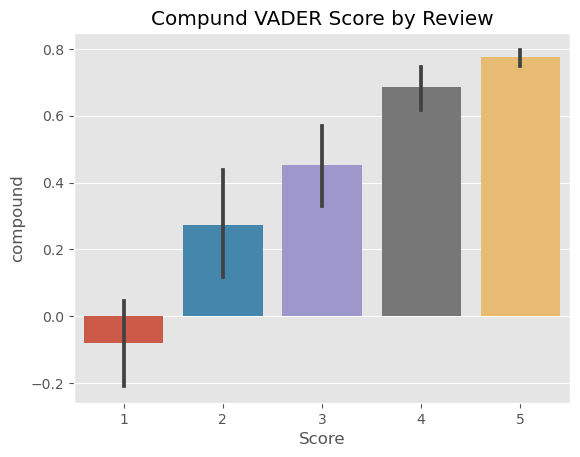

In [25]:
Barplot = sns.barplot(x='Score',y='compound', data=Vaders)
Barplot.set_title('Compund VADER Score by Review')
plt.show()

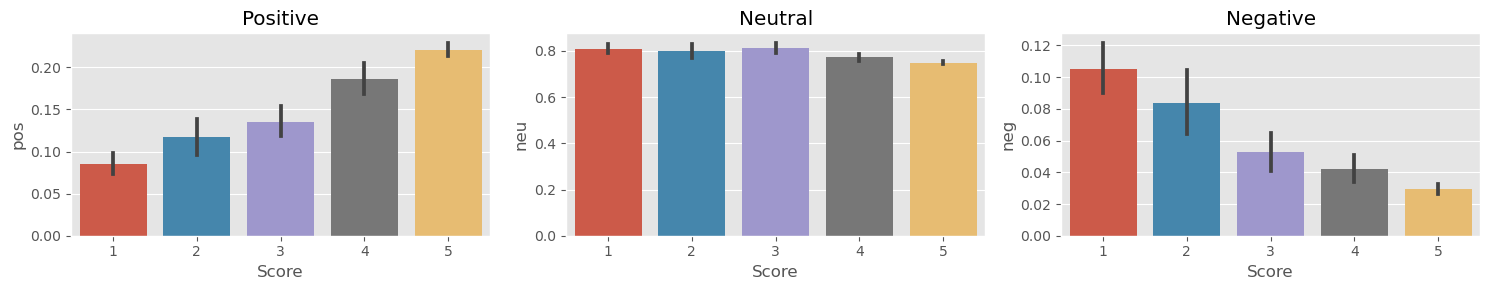

In [26]:
fig, axs = plt.subplots(1,3, figsize=(15,3))

sns.barplot(x='Score',y='pos',data=Vaders, ax = axs[0])
sns.barplot(x='Score',y='neu',data=Vaders, ax = axs[1])
sns.barplot(x='Score',y='neg',data=Vaders, ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

# 2. Roberta Model
Roberta is a pre-trained transformer-based language model developed by Facebook AI Research (FAIR).

Roberta is trained on a large corpus of text data using an unsupervised learning approach called masked language modeling. During training, a random subset of words in the input text is masked, and the model is trained to predict the masked words based on the surrounding context.

In [27]:
!pip install transformers

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
#first download torch from https://pytorch.org/get-started/locally
import torch

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [30]:
#VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [31]:
#Roberta model on example

#use the tokenizer to encode the text example as a sequence of integers, which can be fed to the model. 
encoded_text = tokenizer(example, return_tensors='pt')

#generate model predictions
output = model(**encoded_text)

#extract the output scores from the model's predictions and converts them to a numpy array
scores = output[0][0].detach().numpy()

#apply softmax function and convert the scores to probabilities
scores = softmax(scores)

scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573666}


In [32]:
#define a function to apply roberta on all reviews
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [33]:
#Run the Roberta model on the entire dataset 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [34]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df,how='left')
results_df = results_df.drop(['UserId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','ProductId'],axis=1)

In [35]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,5,Great taffy,Great taffy at a great price. There was a wid...


# Compare Scores Between Models

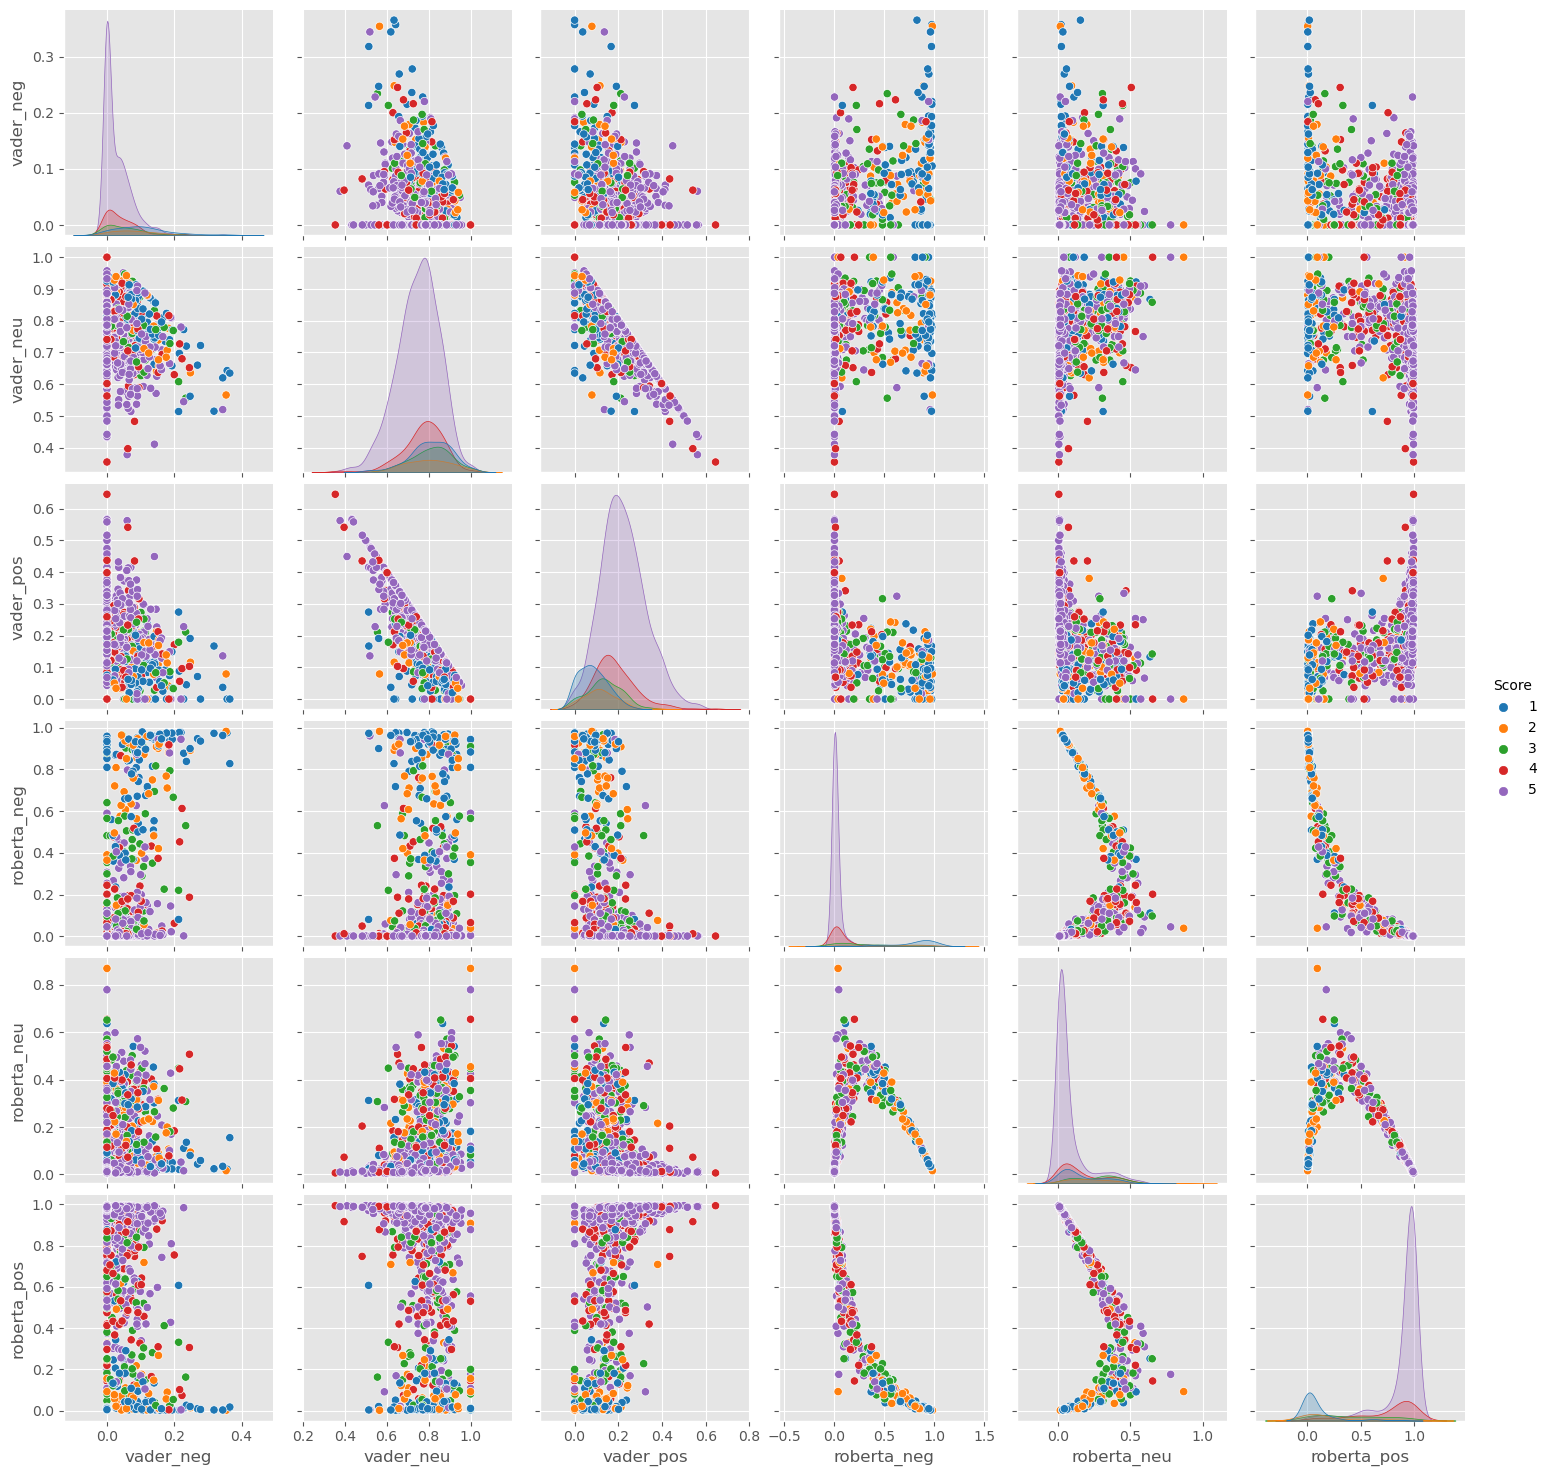

In [36]:
sns.pairplot(vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            data = results_df,
            hue='Score',
            palette='tab10')
plt.show()

# Test 
## Positive Sentiment 1 Star Review

In [37]:
results_df[results_df['Score']==1].sort_values('roberta_pos',ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [38]:
results_df[results_df['Score']==1].sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

## Negative Sentiment 5 Star Review

In [39]:
results_df[results_df['Score']==5].sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [40]:
results_df[results_df['Score']==5].sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformers Pipeline
Transformers Pipeline is a high-level interface provided by the Hugging Face library that allows you to perform common Natural Language Processing (NLP) tasks with pre-trained models. The pipeline provides a simple API for tasks such as text classification, named entity recognition, question-answering, and more.

In [41]:
from transformers import pipeline

In [42]:
nlp = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [43]:
nlp('I love chips')

[{'label': 'POSITIVE', 'score': 0.9998025298118591}]

In [44]:
#Run the transformers pipeline for the entire dataset 
res_pipeline = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        res_pipeline[myid] = nlp(text)
    except RuntimeError:
        continue

  0%|          | 0/1000 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (582 > 512). Running this sequence through the model will result in indexing errors


In [45]:
df_new = pd.read_csv('1000 Amazon Fine Food Reviews.csv')

In [56]:
# Extract scores for each label from the output column and create new columns
pipeline = pd.DataFrame(res_pipeline).T  # store the dictionary as a pd dataframe
pipeline = pipeline.reset_index().rename(columns={'index': 'Id'})
pipeline = pipeline.rename(columns={0:'result'})

pipeline.head()

,Id,result
0,1,"{'label': 'POSITIVE', 'score': 0.9983851909637..."
1,2,"{'label': 'NEGATIVE', 'score': 0.9995254278182..."
2,3,"{'label': 'POSITIVE', 'score': 0.9997652173042..."
3,4,"{'label': 'POSITIVE', 'score': 0.9991534948348..."
4,5,"{'label': 'POSITIVE', 'score': 0.9987082481384..."


In [58]:
# Extract label and score from the result column
pipeline['label'] = pipeline['result'].apply(lambda x: x['label'])
pipeline['pipeline_score'] = pipeline['result'].apply(lambda x: x['score'])


# Show the updated dataframe
pipeline.head()

,Id,result,label,pipeline_score
0,1,"{'label': 'POSITIVE', 'score': 0.9983851909637...",POSITIVE,0.998385
1,2,"{'label': 'NEGATIVE', 'score': 0.9995254278182...",NEGATIVE,0.999525
2,3,"{'label': 'POSITIVE', 'score': 0.9997652173042...",POSITIVE,0.999765
3,4,"{'label': 'POSITIVE', 'score': 0.9991534948348...",POSITIVE,0.999153
4,5,"{'label': 'POSITIVE', 'score': 0.9987082481384...",POSITIVE,0.998708


In [59]:
pipeline.drop(columns=['result'], inplace=True)

In [60]:
pipeline = pipeline.merge(df_new, how='left')
pipeline = pipeline.drop(['UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','ProductId'], axis=1)
pipeline.head()

,Id,label,pipeline_score,Unnamed: 0,Score,Summary,Text
0,1,POSITIVE,0.998385,0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,NEGATIVE,0.999525,1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,POSITIVE,0.999765,2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,POSITIVE,0.999153,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,POSITIVE,0.998708,4,5,Great taffy,Great taffy at a great price. There was a wid...


In [61]:
pipeline.drop(columns=['Unnamed: 0'], inplace=True)

In [62]:
pipeline.head()

,Id,label,pipeline_score,Score,Summary,Text
0,1,POSITIVE,0.998385,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,NEGATIVE,0.999525,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,POSITIVE,0.999765,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,POSITIVE,0.999153,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,POSITIVE,0.998708,5,Great taffy,Great taffy at a great price. There was a wid...
